In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

import env as e
import wrangle as w
import acquire as acq
import evaluate as eva
import explore as exp
import prepare as p

# 1.
Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.



# Data Acquisition

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Data Preparation



In [3]:
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace('.','_'))
df.columns = new_col_name

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#check for nulls
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Choose features other than the ones used in the lesson.




In [5]:
X = df[['petal_width','sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


# Modeling

### Create and Fit cluster model



- Visualize the results of your clustering.


In [6]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Add cluster to our original data


In [7]:
# make a new column names cluster in iris and X dataframe
df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)


df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [8]:
# take a look at a sample of our data
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
127,6.2,2.8,4.8,1.8,virginica,0
143,5.8,2.7,5.1,1.9,virginica,0
29,5.2,3.4,1.4,0.2,setosa,1
49,5.3,3.7,1.5,0.2,setosa,1
30,4.7,3.2,1.6,0.2,setosa,1
144,6.8,3.2,5.9,2.3,virginica,0
15,5.8,4.0,1.2,0.2,setosa,1
85,5.4,3.0,4.5,1.5,versicolor,2
112,6.4,2.7,5.3,1.9,virginica,0
16,5.7,4.4,1.5,0.4,setosa,1


In [9]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [10]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [11]:
#  Find the mean of the original df and groupby cluster
df.groupby('cluster')['petal_width','sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [12]:
#By converting cluster to a string column, sns recognized it as a categorical variable, allowing you to assign custom colors using a palette.
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

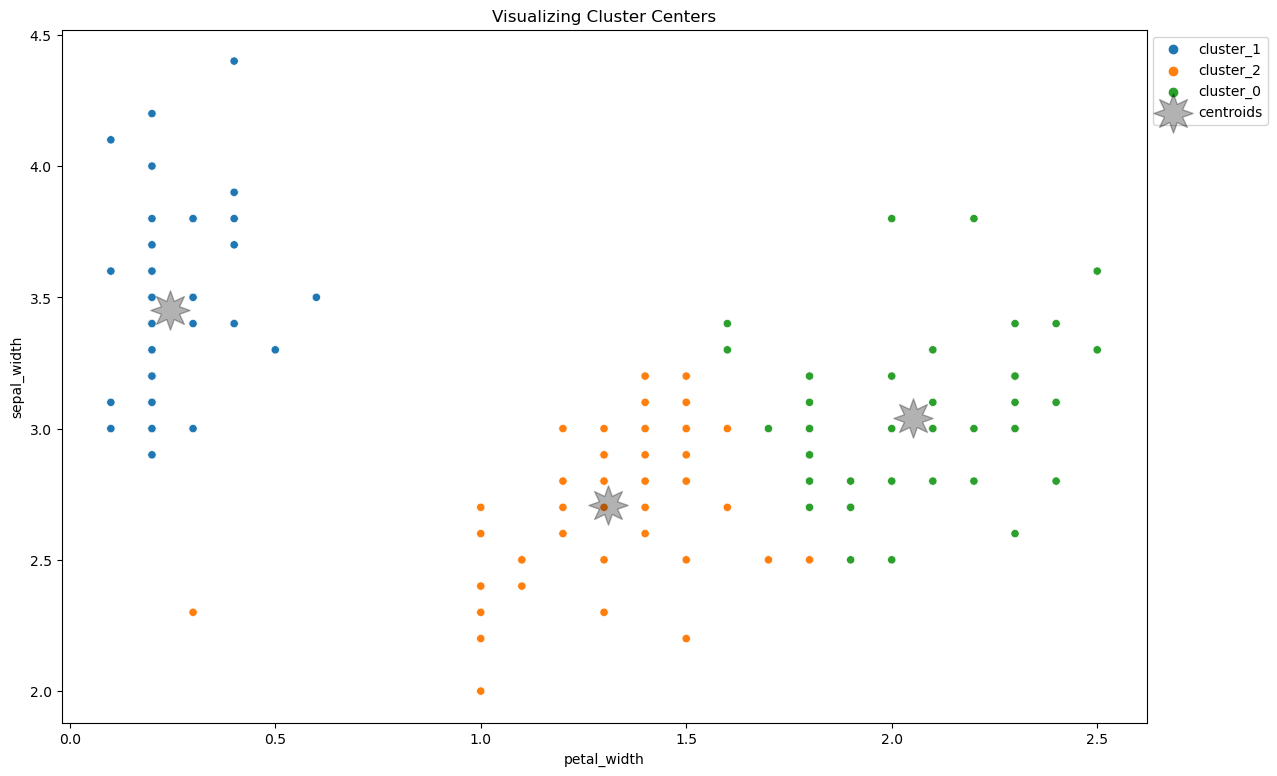

In [13]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.show()

In [14]:
kmeans.inertia_

20.602395953664484

Use the elbow method to visually select a good value for k.


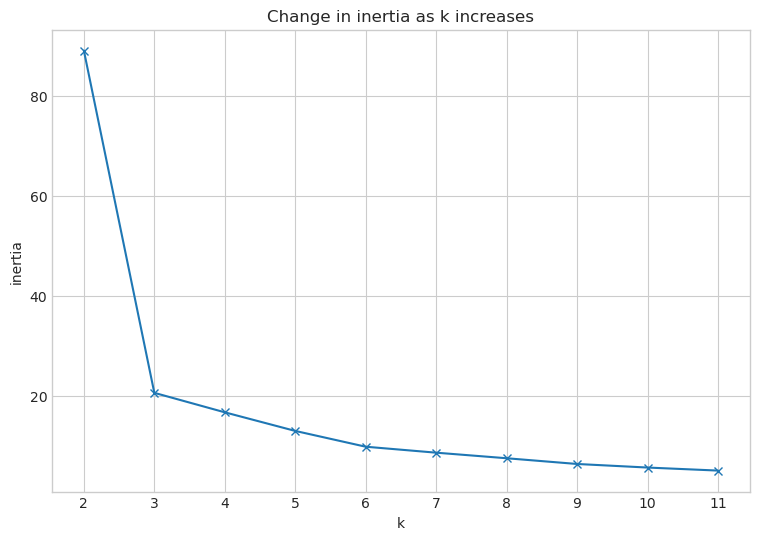

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Repeat the clustering, this time with 3 different features.



In [16]:
X = df[['petal_length','sepal_width', 'sepal_length']]
X.head()

,petal_length,sepal_width,sepal_length
1,1.4,3.5,5.1
2,1.4,3.0,4.9
3,1.3,3.2,4.7
4,1.5,3.1,4.6
5,1.4,3.6,5.0


# Modeling

### Create and Fit cluster model


- Visualize the results of your clustering.


In [17]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Add cluster to our original data


In [18]:
# make a new column names cluster in iris and X dataframe
df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)


df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [19]:
# take a look at a sample of our data
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
125,6.7,3.3,5.7,2.1,virginica,2
150,5.9,3.0,5.1,1.8,virginica,0
47,5.1,3.8,1.6,0.2,setosa,1
53,6.9,3.1,4.9,1.5,versicolor,2
36,5.0,3.2,1.2,0.2,setosa,1
15,5.8,4.0,1.2,0.2,setosa,1
57,6.3,3.3,4.7,1.6,versicolor,0
123,7.7,2.8,6.7,2.0,virginica,2
58,4.9,2.4,3.3,1.0,versicolor,0
108,7.3,2.9,6.3,1.8,virginica,2


In [20]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[4.3637931 , 2.73275862, 5.84655172],
       [1.462     , 3.428     , 5.006     ],
       [5.6547619 , 3.06428571, 6.83571429]])

In [21]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:3])
centroids

,petal_length,sepal_width,sepal_length
0,4.363793,2.732759,5.846552
1,1.462000,3.428000,5.006000
2,5.654762,3.064286,6.835714


In [22]:
#  Find the mean of the original df and groupby cluster
df.groupby('cluster')['petal_length','sepal_width', 'sepal_length'].mean()

,petal_length,sepal_width,sepal_length
cluster,,,
0,4.363793,2.732759,5.846552
1,1.462000,3.428000,5.006000
2,5.654762,3.064286,6.835714


In [23]:
#By converting cluster to a string column, sns recognized it as a categorical variable, allowing you to assign custom colors using a palette.
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


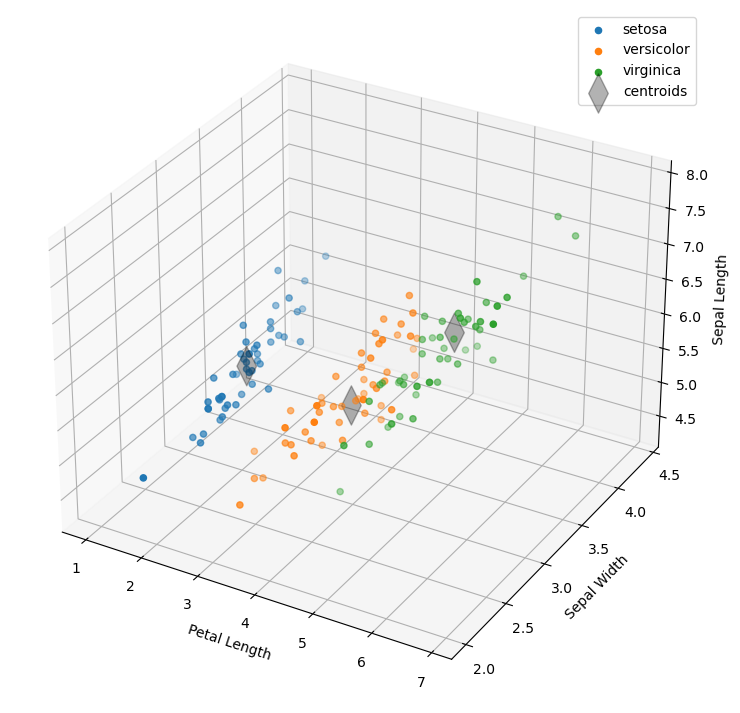

In [24]:
# Assuming 'species' is a categorical variable in your DataFrame
categories = df['species'].unique()

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')

for category in categories:
    subset = df[df['species'] == category]
    ax.scatter(subset['petal_length'], subset['sepal_width'], subset['sepal_length'], label=category)

# Plot centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:3])

ax.scatter(centroids['petal_length'], centroids['sepal_width'], centroids['sepal_length'], color='k', alpha=0.3, s=800, marker=(2,1,0), label='centroids')

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Sepal Length')

ax.legend()
plt.show()


In [25]:
kmeans.inertia_

69.42973924466338

Use the elbow method to visually select a good value for k.


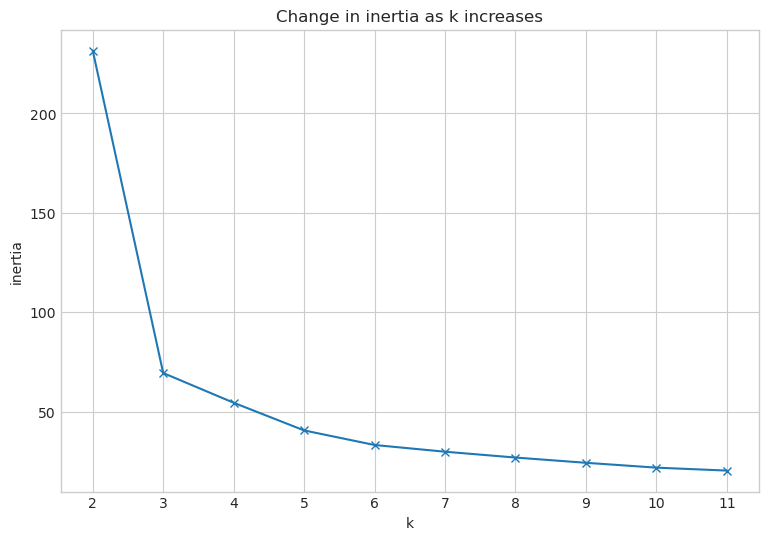

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# 2

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [27]:
#get mall data using function
df = acq.get_mallcustomer_data()


In [28]:
#check it out
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Data Preparation

In [29]:
# what is the shape?
df.shape

(200, 4)

In [30]:
# check out more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


SUMMARY REPORT
          
          
Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
          
          
Dataframe Description: 
                count   mean        std   min    25%   50%   75%    max
age             200.0  38.85  13.969007  18.0  28.75  36.0  49.0   70.0
annual_i

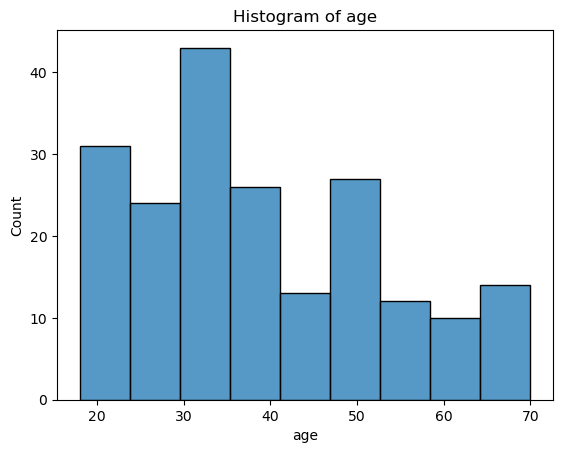

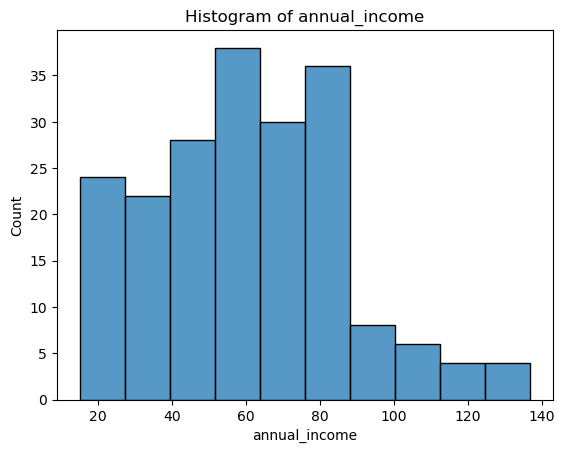

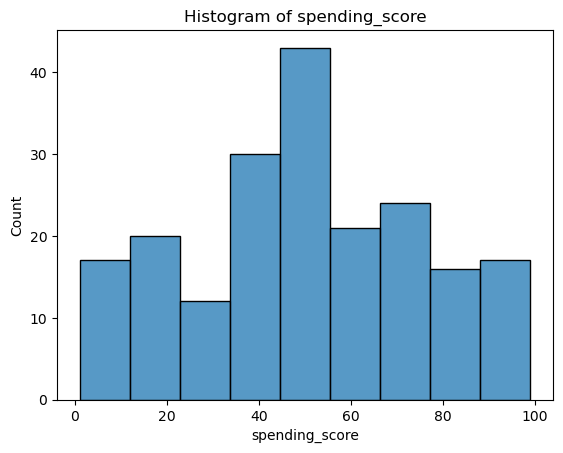

In [31]:
p.summarize(df)

In [32]:
#prep my data!
df, train, validate, test = p.prep_mall(df)

df: (200, 5)

train: (120, 8)
validate: (40, 8)
test: (40, 8)


In [33]:
#check out dataframe
df.head()

,gender,age,annual_income,spending_score,is_male
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [34]:
#check out train
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417
87,Female,55,57,58,0,0.711538,0.378378,0.593750
146,Male,28,77,97,1,0.192308,0.558559,1.000000
67,Female,43,48,50,0,0.480769,0.297297,0.510417
165,Male,50,85,26,1,0.615385,0.630631,0.260417


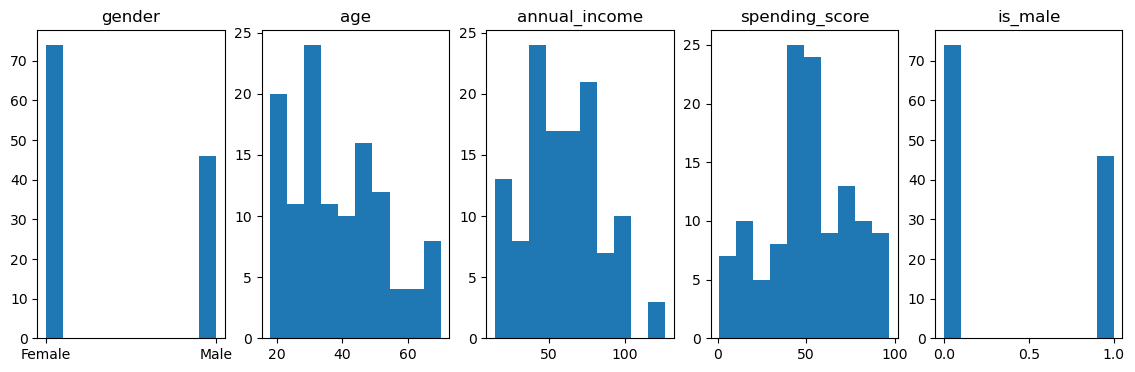

In [35]:
#distribution of all my variables
plt.figure(figsize=(14,4))

for i, col in enumerate(train.columns[:-3]):
    plt.subplot(1,len(train.columns[:-3]),i+1)
    plt.hist(train[col])
    plt.title(col)

# Explore

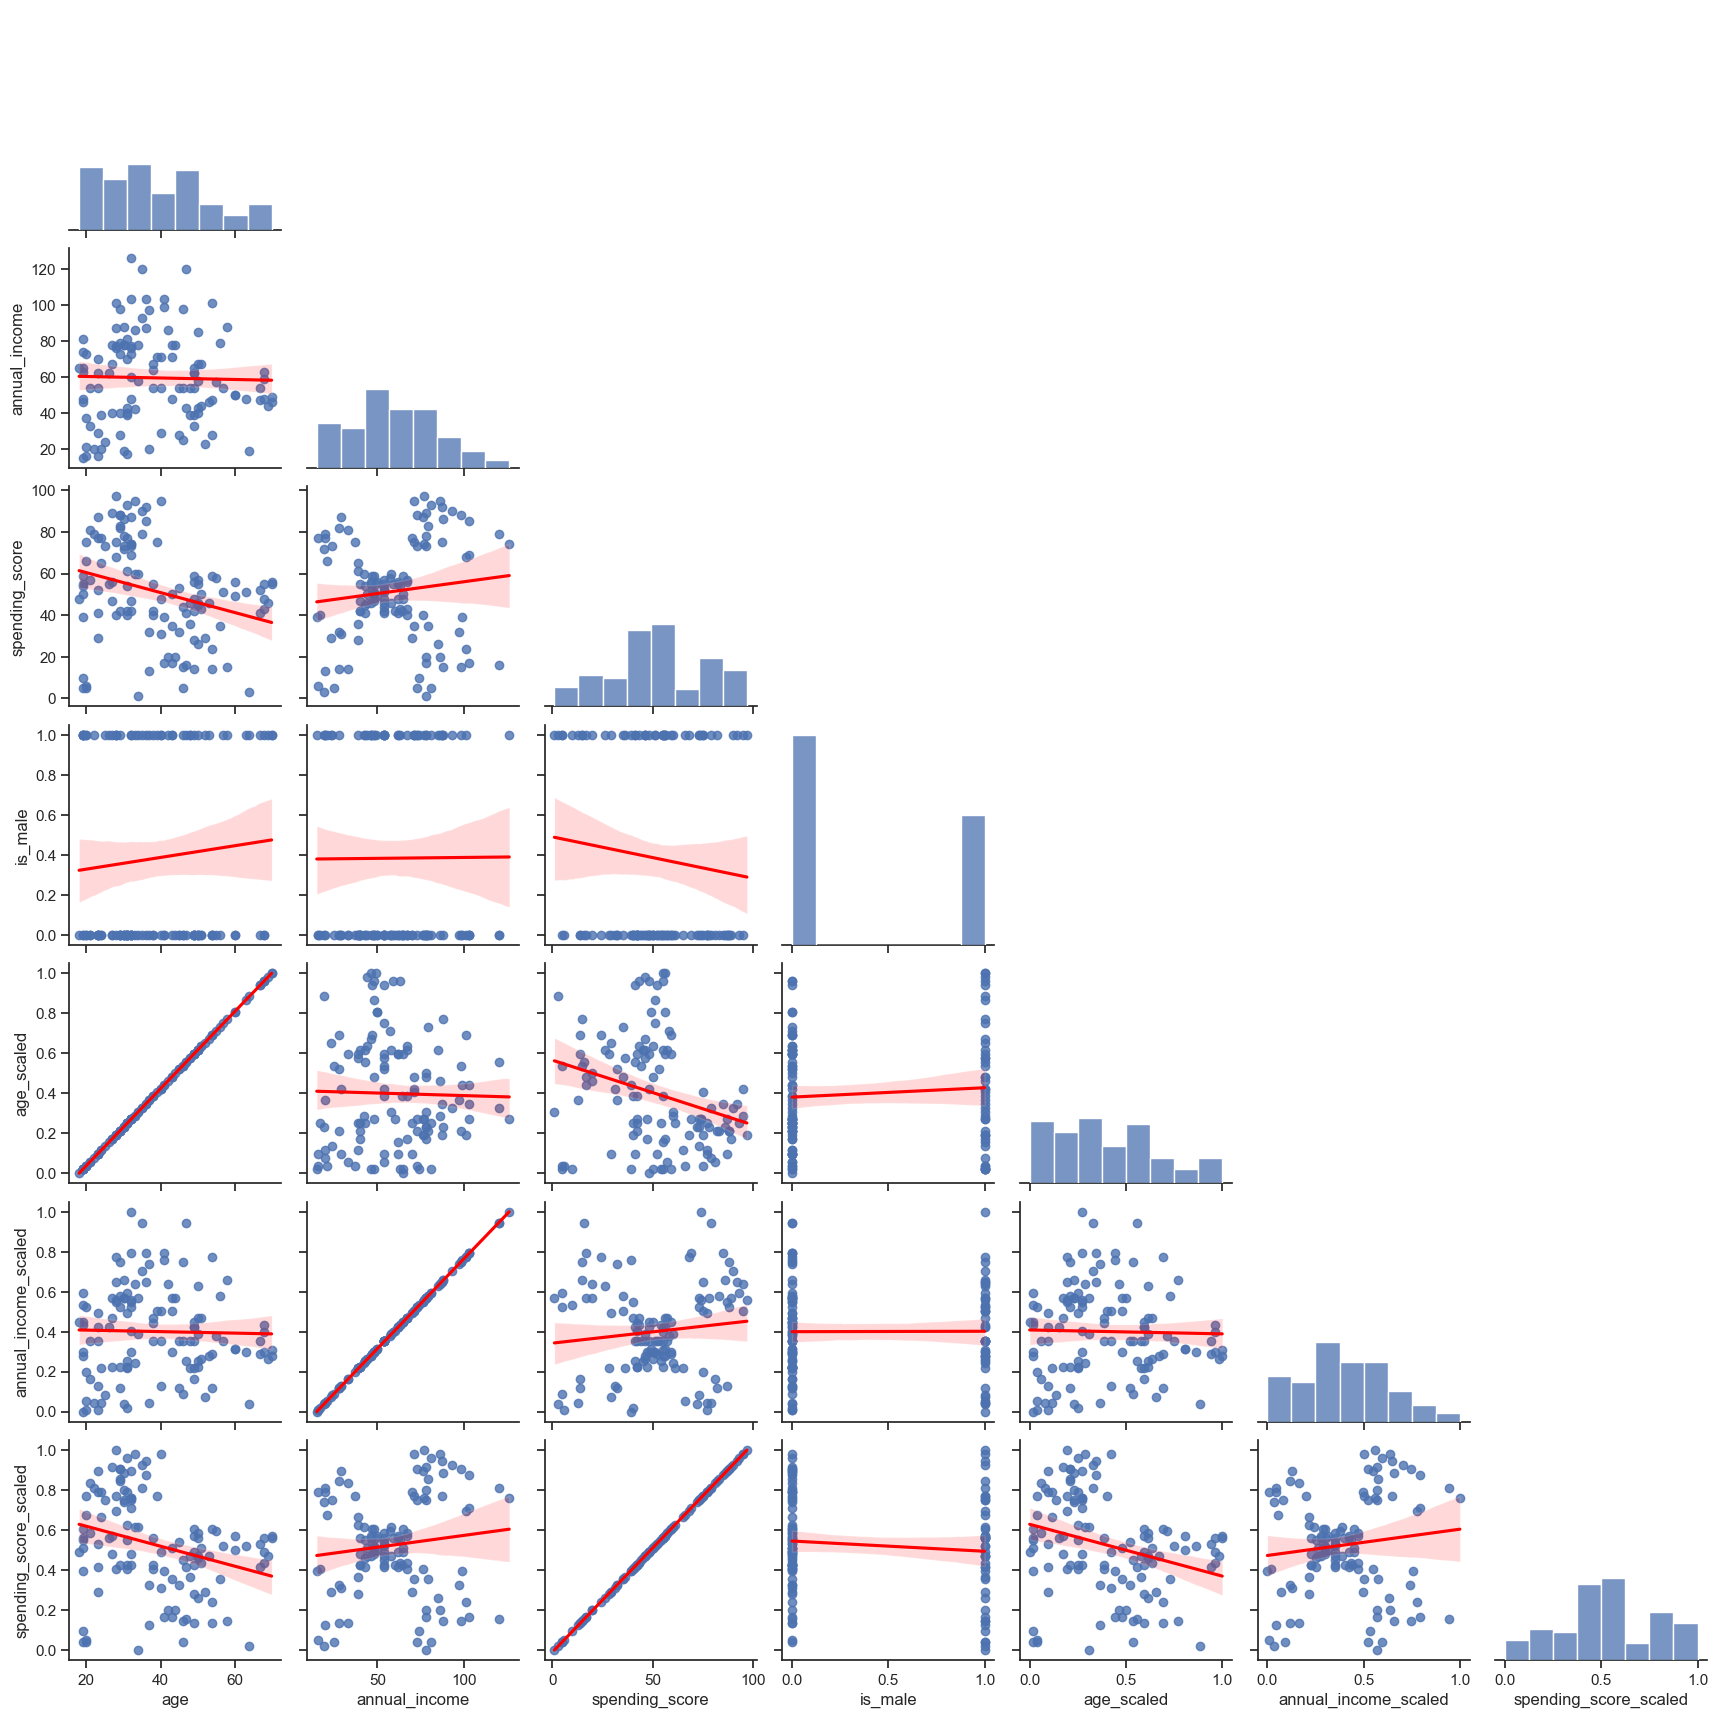

In [36]:
# explore gender and age
exp.plot_variable_pairs(train)

In [37]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417
87,Female,55,57,58,0,0.711538,0.378378,0.593750
146,Male,28,77,97,1,0.192308,0.558559,1.000000
67,Female,43,48,50,0,0.480769,0.297297,0.510417
165,Male,50,85,26,1,0.615385,0.630631,0.260417


In [38]:
## Explore categorical and continuous variables

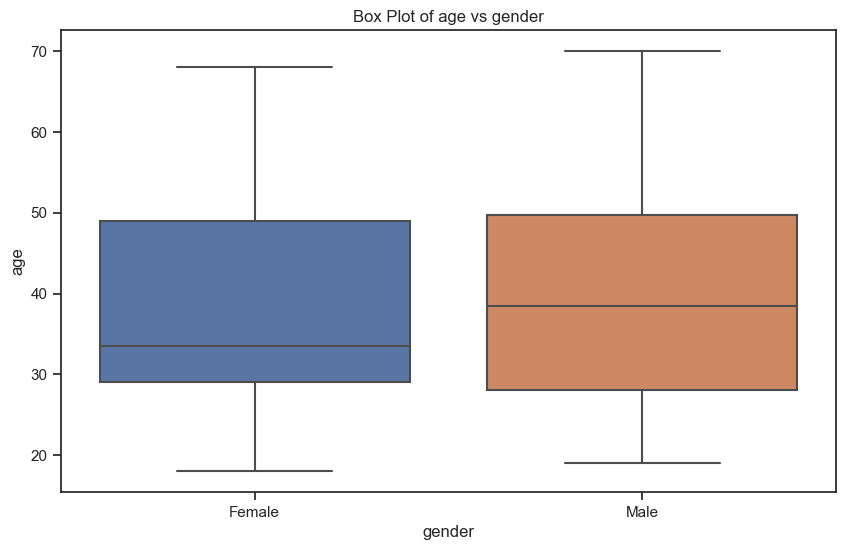

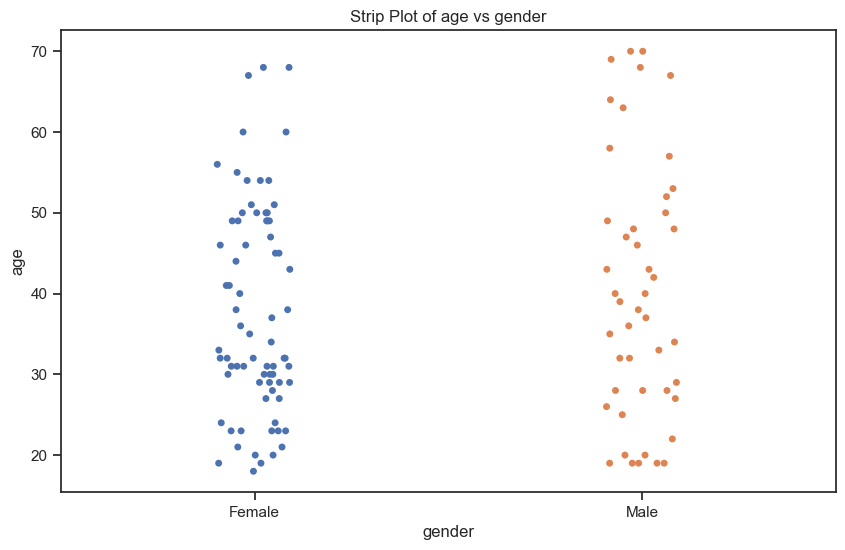

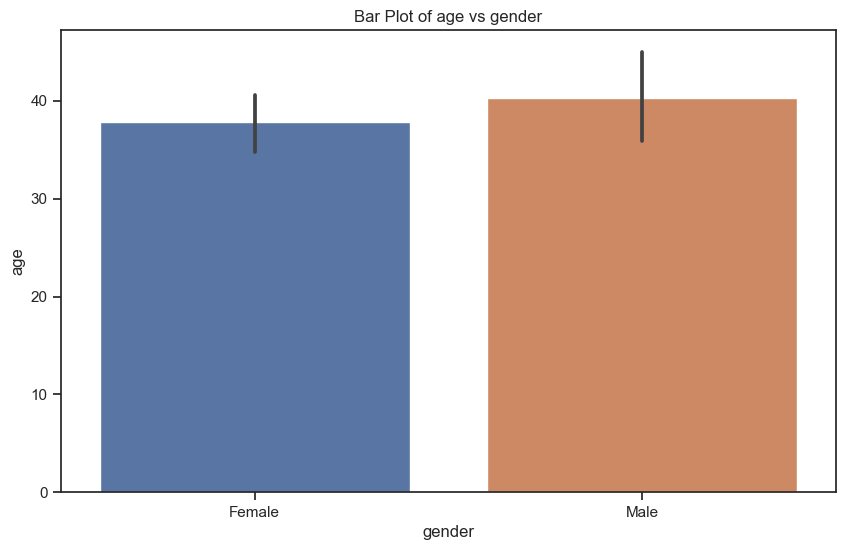

In [39]:
# explore gender and age
exp.plot_categorical_and_continuous_vars(train, 'gender', 'age')

- average age of males is greater

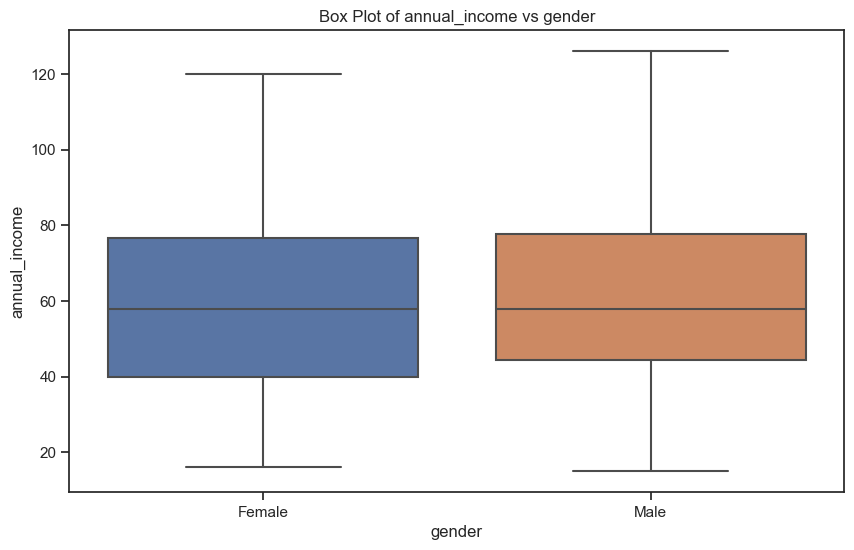

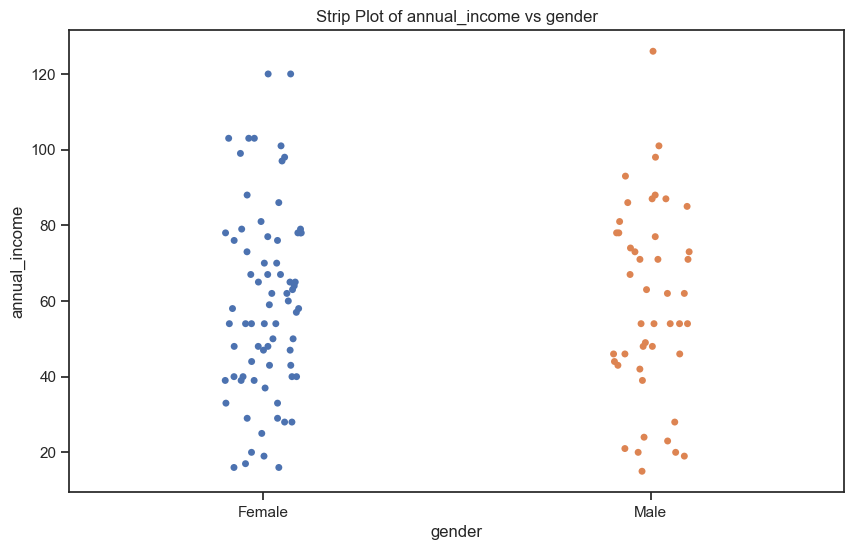

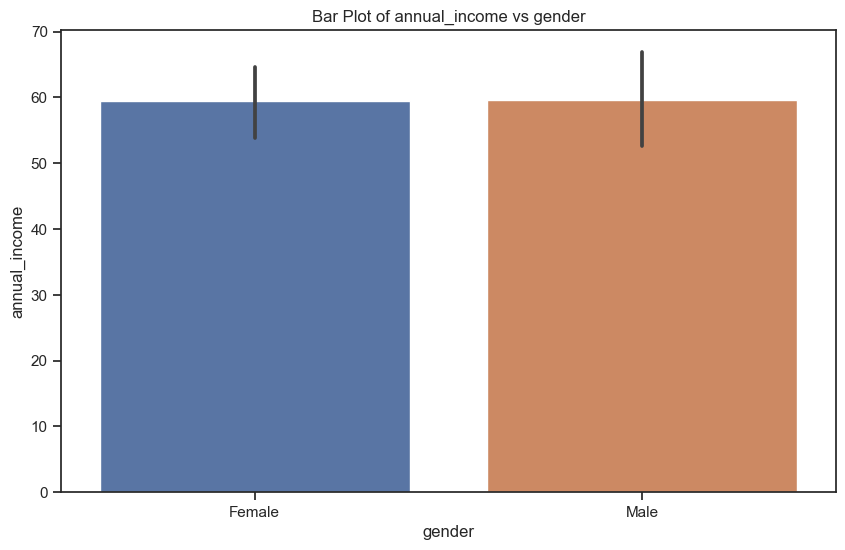

In [40]:
# explore gender and annual income
exp.plot_categorical_and_continuous_vars(train, 'gender', 'annual_income')

- income seems to be similar among male and female

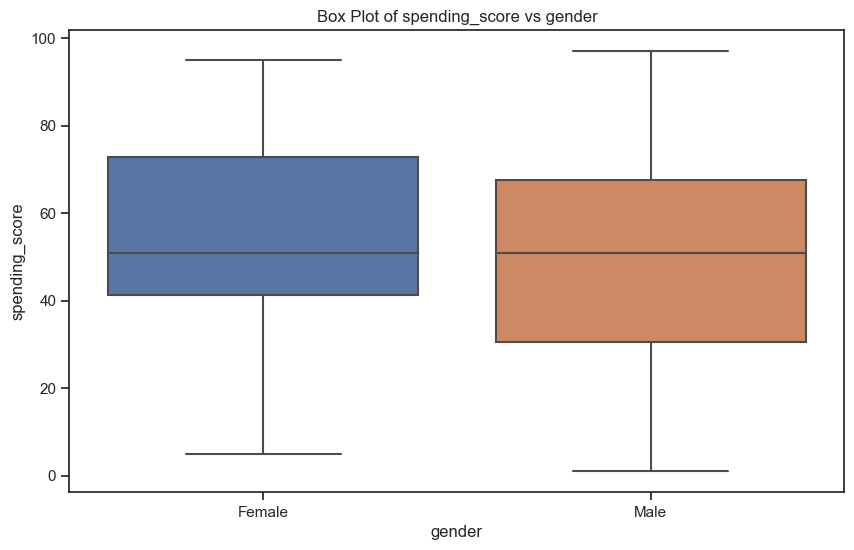

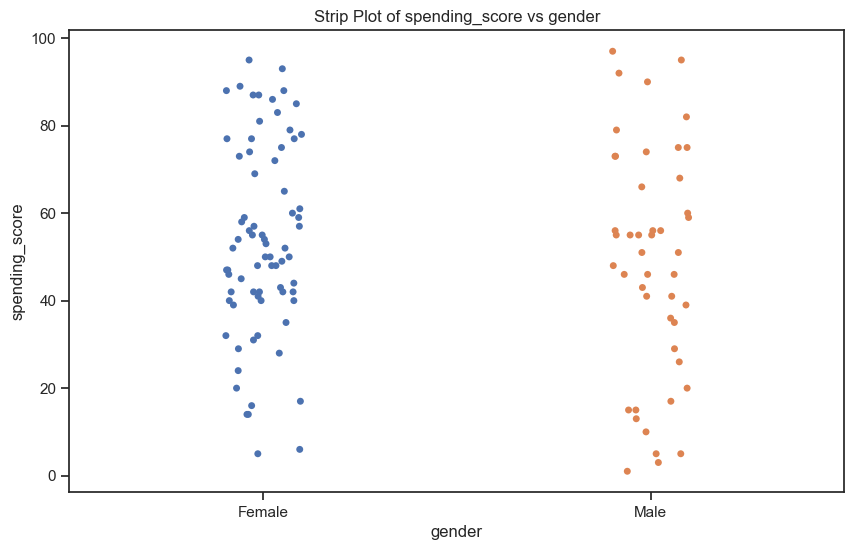

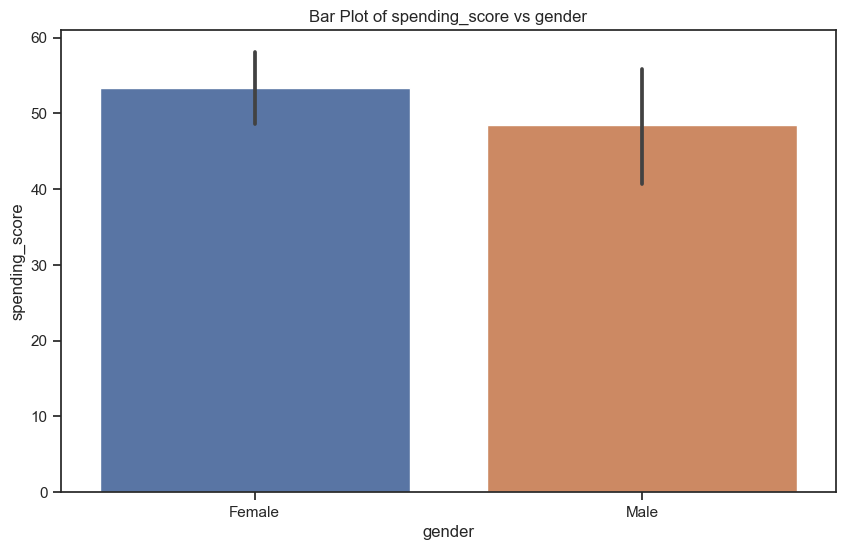

In [41]:
# explore gender and spending score
exp.plot_categorical_and_continuous_vars(train, 'gender', 'spending_score')

- spending score is slightly higher on average with females

In [42]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417
87,Female,55,57,58,0,0.711538,0.378378,0.593750
146,Male,28,77,97,1,0.192308,0.558559,1.000000
67,Female,43,48,50,0,0.480769,0.297297,0.510417
165,Male,50,85,26,1,0.615385,0.630631,0.260417


## Explore continuous vs. continuous variables

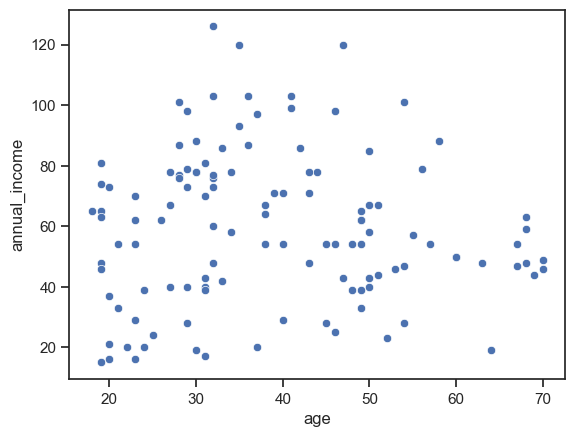

In [43]:
# age and annual income
sns.scatterplot(data=train, x='age', y='annual_income')
plt.show()

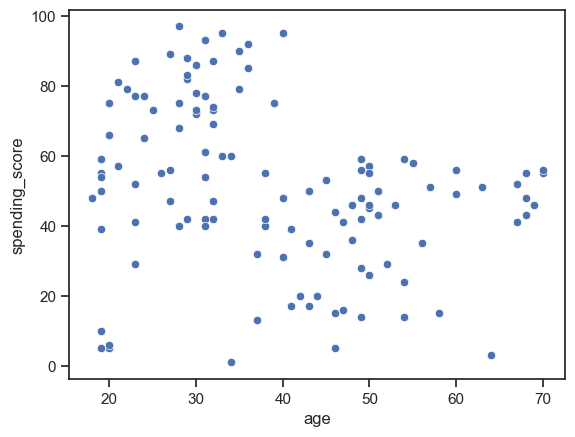

In [44]:
# age and spending score
sns.scatterplot(data=train, x='age',y='spending_score')
plt.show()

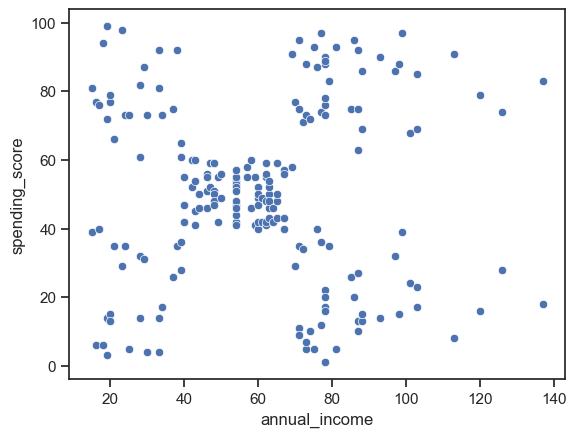

In [45]:
# annual income and spending score
sns.scatterplot(data=df, x='annual_income', y='spending_score')
plt.show()

# Modeling on non-scaled data

### Create and Fit cluster model



In [46]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417
87,Female,55,57,58,0,0.711538,0.378378,0.593750
146,Male,28,77,97,1,0.192308,0.558559,1.000000
67,Female,43,48,50,0,0.480769,0.297297,0.510417
165,Male,50,85,26,1,0.615385,0.630631,0.260417


In [47]:
X = train[['spending_score','annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
116,50,65
87,58,57
146,97,77
67,50,48
165,26,85


In [48]:
# MAKE the thing
kmeans = KMeans(n_clusters=5)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([4, 4, 0, 4, 3, 3, 4, 0, 4, 0, 4, 2, 4, 1, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 1, 2, 3, 0, 3, 0, 4, 0, 3, 4, 3, 1, 3, 1, 0, 4, 4,
       0, 0, 4, 3, 4, 4, 4, 1, 2, 0, 4, 4, 4, 0, 1, 3, 2, 3, 4, 4, 4, 4,
       0, 4, 0, 4, 0, 3, 2, 3, 4, 4, 0, 4, 3, 1, 1, 3, 2, 4, 0, 4, 0, 4,
       4, 0, 2, 4, 2, 3, 0, 4, 4, 0, 3, 1, 4, 4, 2, 4, 0, 4, 2, 4, 2, 1,
       4, 0, 1, 1, 4, 0, 4, 4, 0, 4], dtype=int32)

### Add cluster to our original data


In [49]:
# make a new column names cluster in iris and X dataframe
train['cluster_non_scaled'] = kmeans.predict(X)

X['cluster_non_scaled'] = kmeans.predict(X)


train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled
customer_id,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,4
87,Female,55,57,58,0,0.711538,0.378378,0.593750,4
146,Male,28,77,97,1,0.192308,0.558559,1.000000,0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,4
165,Male,50,85,26,1,0.615385,0.630631,0.260417,3


In [50]:
X

,spending_score,annual_income,cluster_non_scaled
customer_id,,,
116,50,65,4
87,58,57,4
146,97,77,0
67,50,48,4
165,26,85,3
135,5,73,3
48,47,40,4
164,93,81,0
119,43,67,4


In [51]:
# take a look at a sample of our data
train.sample(10)

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled
customer_id,,,,,,,,,
143,Female,28,76,40,0,0.192308,0.549550,0.406250,3
188,Male,28,101,68,1,0.192308,0.774775,0.697917,0
52,Male,33,42,60,1,0.288462,0.243243,0.614583,4
83,Male,67,54,41,1,0.942308,0.351351,0.416667,4
184,Female,29,98,88,0,0.211538,0.747748,0.906250,0
82,Male,38,54,55,1,0.384615,0.351351,0.562500,4
61,Male,70,46,56,1,1.000000,0.279279,0.572917,4
189,Female,41,103,17,0,0.442308,0.792793,0.166667,3
119,Female,51,67,43,0,0.634615,0.468468,0.437500,4


In [52]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[82.625     , 86.41666667],
       [21.16666667, 24.33333333],
       [75.81818182, 26.        ],
       [21.10526316, 86.05263158],
       [50.07407407, 52.7962963 ]])

In [53]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,spending_score,annual_income
0,82.625000,86.416667
1,21.166667,24.333333
2,75.818182,26.000000
3,21.105263,86.052632
4,50.074074,52.796296


In [54]:
#  Find the mean of the original df and groupby cluster
train.groupby('cluster_non_scaled')['spending_score','annual_income'].mean()

,spending_score,annual_income
cluster_non_scaled,,
0,82.625000,86.416667
1,21.166667,24.333333
2,75.818182,26.000000
3,21.105263,86.052632
4,50.074074,52.796296


In [55]:
#By converting cluster to a string column, sns recognized it as a categorical variable, allowing you to assign custom colors using a palette.
train['cluster_non_scaled'] = 'cluster_non_scaled_' + train['cluster_non_scaled'].astype(str)
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled
customer_id,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,cluster_non_scaled_4
87,Female,55,57,58,0,0.711538,0.378378,0.593750,cluster_non_scaled_4
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,cluster_non_scaled_4
165,Male,50,85,26,1,0.615385,0.630631,0.260417,cluster_non_scaled_3


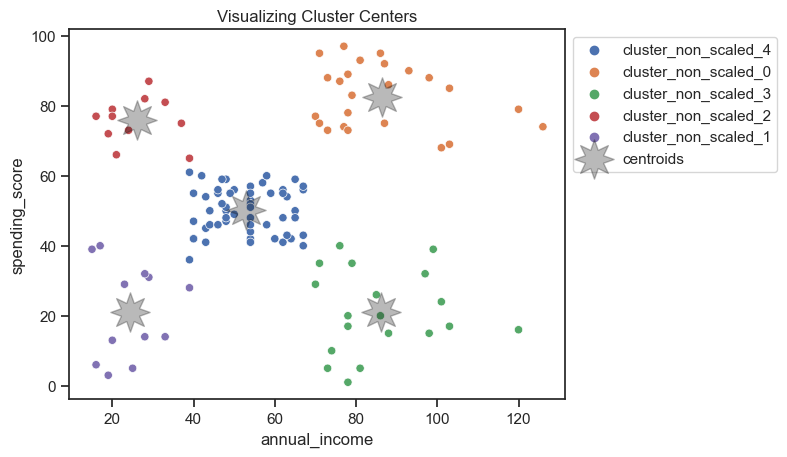

In [56]:
# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = train, hue = 'cluster_non_scaled')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'annual_income', y = 'spending_score', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster_non_scaled'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.show()

In [57]:
kmeans.inertia_

22730.627835371255

Use the elbow method to visually select a good value for k.


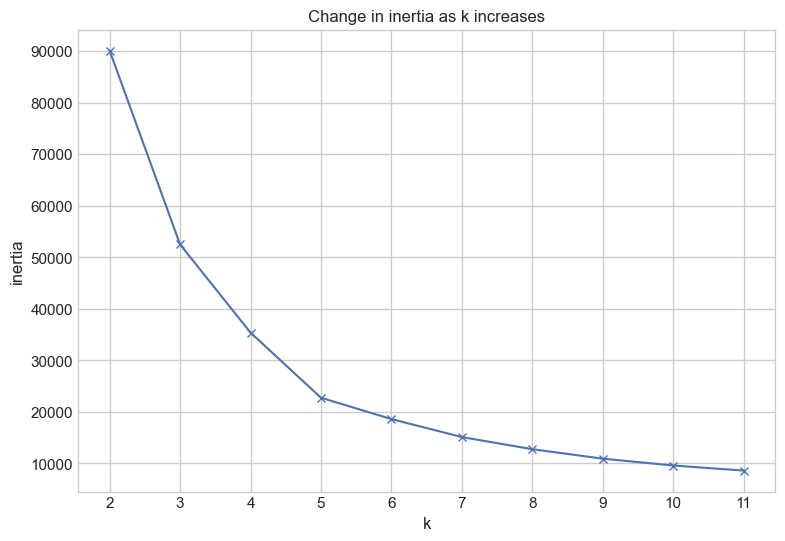

In [58]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [59]:
# Modeling on non-scaled data

### Create and Fit cluster model

In [60]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled
customer_id,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,cluster_non_scaled_4
87,Female,55,57,58,0,0.711538,0.378378,0.593750,cluster_non_scaled_4
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,cluster_non_scaled_4
165,Male,50,85,26,1,0.615385,0.630631,0.260417,cluster_non_scaled_3


In [61]:
X = train[['spending_score_scaled','annual_income_scaled']]
X.head()

,spending_score_scaled,annual_income_scaled
customer_id,,
116,0.510417,0.450450
87,0.593750,0.378378
146,1.000000,0.558559
67,0.510417,0.297297
165,0.260417,0.630631


In [62]:
# MAKE the thing
kmeans = KMeans(n_clusters=5)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([4, 4, 1, 4, 0, 0, 4, 1, 4, 1, 4, 3, 4, 2, 0, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 0, 4, 4, 2, 3, 0, 1, 0, 1, 4, 1, 0, 4, 0, 2, 0, 2, 1, 4, 4,
       1, 1, 4, 0, 4, 4, 4, 2, 3, 1, 4, 4, 4, 1, 2, 0, 3, 0, 4, 4, 4, 4,
       1, 4, 1, 4, 1, 0, 3, 0, 4, 4, 1, 4, 0, 2, 2, 0, 3, 4, 1, 4, 1, 4,
       4, 1, 3, 4, 3, 0, 1, 4, 4, 1, 0, 2, 4, 4, 3, 4, 1, 4, 3, 4, 3, 2,
       4, 1, 2, 2, 4, 1, 4, 4, 1, 4], dtype=int32)

In [63]:
# MAKE the thing
kmeans = KMeans(n_clusters=5)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 3, 4, 2, 0, 2, 0, 1, 0, 2, 1, 2, 3, 2, 3, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 3, 4, 0, 1, 1, 1, 0, 3, 2, 4, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 4, 2, 1, 1, 0, 1, 2, 3, 3, 2, 4, 1, 0, 1, 0, 1,
       1, 0, 4, 1, 4, 2, 0, 1, 1, 0, 2, 3, 1, 1, 4, 1, 0, 1, 4, 1, 4, 3,
       1, 0, 3, 3, 1, 0, 1, 1, 0, 1], dtype=int32)

In [64]:
### Add cluster to our original data

In [65]:
# make a new column names cluster in iris and X dataframe
train['cluster_scaled'] = kmeans.predict(X)

X['cluster_scaled'] = kmeans.predict(X)


train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled,cluster_scaled
customer_id,,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,cluster_non_scaled_4,1
87,Female,55,57,58,0,0.711538,0.378378,0.593750,cluster_non_scaled_4,1
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0,0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,cluster_non_scaled_4,1
165,Male,50,85,26,1,0.615385,0.630631,0.260417,cluster_non_scaled_3,2


In [66]:
X

,spending_score_scaled,annual_income_scaled,cluster_scaled
customer_id,,,
116,0.510417,0.450450,1
87,0.593750,0.378378,1
146,1.000000,0.558559,0
67,0.510417,0.297297,1
165,0.260417,0.630631,2
135,0.041667,0.522523,2
48,0.479167,0.225225,1
164,0.958333,0.594595,0
119,0.437500,0.468468,1


In [67]:
# take a look at a sample of our data
train.sample(10)

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled,cluster_scaled
customer_id,,,,,,,,,,
159,Male,34,78,1,1,0.307692,0.567568,0.000000,cluster_non_scaled_3,2
144,Female,32,76,87,0,0.269231,0.549550,0.895833,cluster_non_scaled_0,0
64,Female,54,47,59,0,0.692308,0.288288,0.604167,cluster_non_scaled_4,1
4,Female,23,16,77,0,0.096154,0.009009,0.791667,cluster_non_scaled_2,4
125,Female,23,70,29,0,0.096154,0.495495,0.291667,cluster_non_scaled_3,2
44,Female,31,39,61,0,0.250000,0.216216,0.625000,cluster_non_scaled_4,1
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0,0
105,Male,49,62,56,1,0.596154,0.423423,0.572917,cluster_non_scaled_4,1
73,Female,60,50,49,0,0.807692,0.315315,0.500000,cluster_non_scaled_4,1


In [68]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[0.85026042, 0.64339339],
       [0.51118827, 0.34050717],
       [0.20942982, 0.6401138 ],
       [0.21006944, 0.08408408],
       [0.77935606, 0.0990991 ]])

In [69]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,spending_score_scaled,annual_income_scaled
0,0.850260,0.643393
1,0.511188,0.340507
2,0.209430,0.640114
3,0.210069,0.084084
4,0.779356,0.099099


In [70]:
#  Find the mean of the original df and groupby cluster
train.groupby('cluster_scaled')['spending_score','annual_income'].mean()

,spending_score,annual_income
cluster_scaled,,
0,82.625000,86.416667
1,50.074074,52.796296
2,21.105263,86.052632
3,21.166667,24.333333
4,75.818182,26.000000


In [71]:
#By converting cluster to a string column, sns recognized it as a categorical variable, allowing you to assign custom colors using a palette.
train['cluster_scaled'] = 'cluster_scaled_' + train['cluster_scaled'].astype(str)
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled,cluster_scaled
customer_id,,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,cluster_non_scaled_4,cluster_scaled_1
87,Female,55,57,58,0,0.711538,0.378378,0.593750,cluster_non_scaled_4,cluster_scaled_1
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0,cluster_scaled_0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,cluster_non_scaled_4,cluster_scaled_1
165,Male,50,85,26,1,0.615385,0.630631,0.260417,cluster_non_scaled_3,cluster_scaled_2


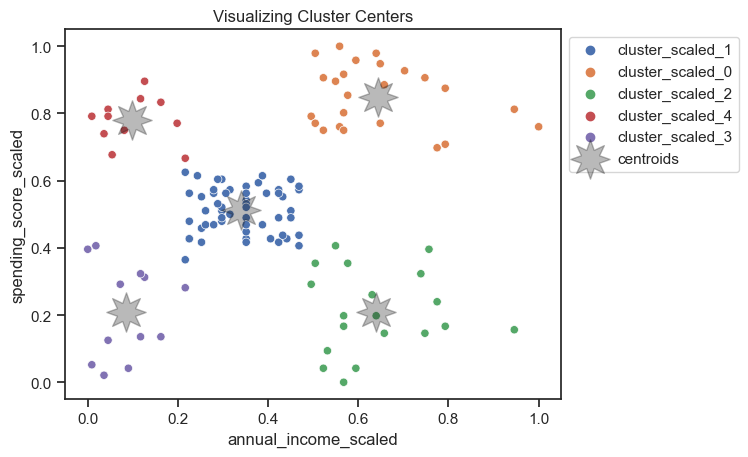

In [72]:
# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income_scaled', y = 'spending_score_scaled', data = train, hue = 'cluster_scaled')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'annual_income_scaled', y = 'spending_score_scaled', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster_scaled'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.show()

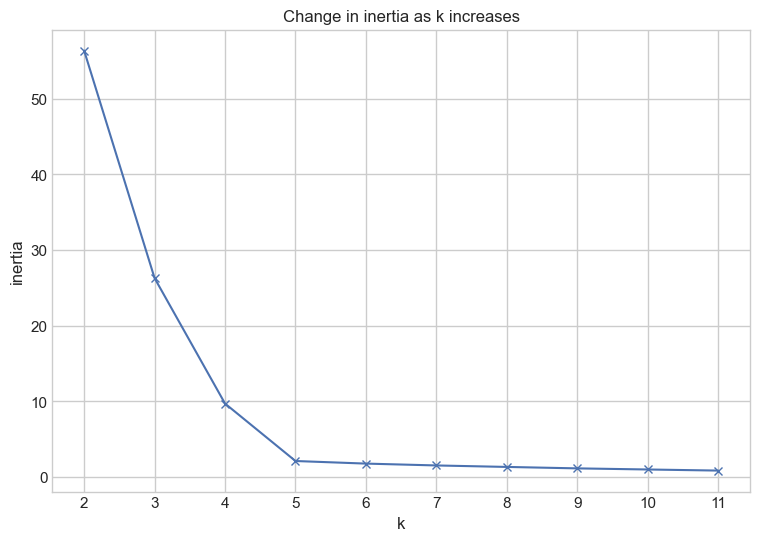

In [73]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [74]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,spending_score_scaled,cluster_non_scaled,cluster_scaled
customer_id,,,,,,,,,,
116,Female,19,65,50,0,0.019231,0.450450,0.510417,cluster_non_scaled_4,cluster_scaled_1
87,Female,55,57,58,0,0.711538,0.378378,0.593750,cluster_non_scaled_4,cluster_scaled_1
146,Male,28,77,97,1,0.192308,0.558559,1.000000,cluster_non_scaled_0,cluster_scaled_0
67,Female,43,48,50,0,0.480769,0.297297,0.510417,cluster_non_scaled_4,cluster_scaled_1
165,Male,50,85,26,1,0.615385,0.630631,0.260417,cluster_non_scaled_3,cluster_scaled_2


In [75]:
X.head()

,spending_score_scaled,annual_income_scaled,cluster_scaled
customer_id,,,
116,0.510417,0.450450,1
87,0.593750,0.378378,1
146,1.000000,0.558559,0
67,0.510417,0.297297,1
165,0.260417,0.630631,2


- non-scaled
    - spending_score	annual_income
    - 0	50.074074	52.796296
    - 1	82.625000	86.416667
    - 2	21.105263	86.052632
    - 3	21.166667	24.333333
    - 4	75.818182	26.000000

- v/s

- cluster_scaled		
    - spending score  annual_income
    - 0	50.074074	52.796296
    - 1	21.166667	24.333333
    - 2 21.105263	86.052632
    - 3	75.818182	26.000000
    - 4	82.625000	86.416667

# 3 
- Bonus

In [116]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'

csv_export_url = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
csv_export_url


'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&gid=0'

In [117]:
df = pd.read_csv(csv_export_url)
df

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


In [118]:
df.shape

(800, 2)

In [119]:
df.describe()

,x,y
count,800.000000,800.000000
mean,0.508449,2.973206
std,9.906209,3.156376
min,-30.572062,-3.146259
25%,-6.068600,-0.047636
50%,0.581809,3.040642
75%,7.579269,5.996474
max,29.489457,8.817347


In [120]:
df.columns

Index(['x', 'y'], dtype='object')

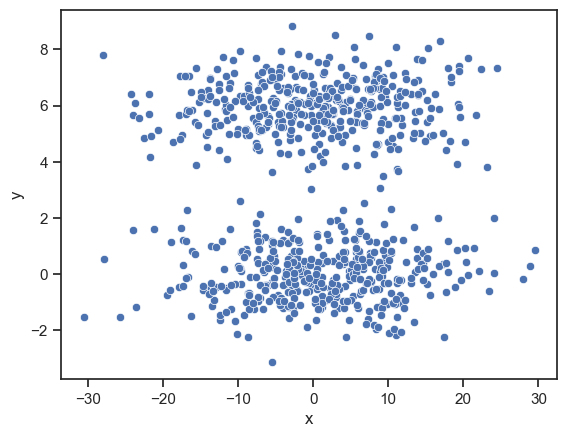

In [121]:
# visualize
sns.scatterplot(data=df, x=df.x, y=df.y)
plt.show()

In [122]:
X = df[['x','y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [123]:
# MAKE the thing
kmeans = KMeans(n_clusters=5)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 3, 2, 1, 0, 0, 1, 3, 1, 4, 3, 0, 1, 3, 3, 0, 3, 4, 0, 3,
       4, 3, 2, 3, 3, 0, 1, 4, 3, 2, 4, 2, 1, 1, 0, 0, 3, 1, 0, 4, 2, 3,
       0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 3, 1, 0, 1, 2, 3, 3, 1, 0,
       1, 1, 4, 3, 3, 1, 1, 0, 0, 3, 1, 1, 4, 0, 4, 1, 3, 3, 0, 4, 1, 3,
       1, 0, 4, 1, 0, 3, 3, 1, 2, 3, 0, 2, 3, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 3, 0, 4, 1, 0, 0, 1, 3, 1, 1, 1, 0, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 2, 0, 3, 1, 3, 0, 1, 4, 1, 1, 4, 3, 4, 1, 0, 4, 3, 3, 2, 1, 1,
       2, 1, 3, 3, 4, 3, 2, 1, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 1, 1, 3, 4, 3, 1, 1, 3, 4, 1, 2, 3, 2, 2, 0, 1, 3, 1, 1, 0,
       1, 3, 0, 1, 0, 3, 3, 0, 0, 2, 2, 0, 4, 0, 0, 1, 0, 3, 1, 0, 4, 3,
       1, 1, 2, 3, 4, 1, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 4, 1,
       2, 3, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 4, 4, 0, 3, 2, 3, 0,
       1, 2, 1, 3, 3, 3, 0, 0, 2, 0, 3, 1, 1, 3, 0, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 3, 0, 3, 0, 4, 2, 0, 0, 3, 4, 1, 1, 2,

In [124]:
X['cluster'] = kmeans.predict(X)


X.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,3
4,17.283668,0.344804,2


In [125]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[  1.48714418,   3.43090016],
       [ -5.71081294,   2.59222493],
       [ 17.47088646,   3.34394046],
       [  8.46705573,   2.47852393],
       [-15.8425467 ,   3.54253449]])

In [126]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,x,y
0,1.487144,3.430900
1,-5.710813,2.592225
2,17.470886,3.343940
3,8.467056,2.478524
4,-15.842547,3.542534


In [127]:
#  Find the mean of the original df and groupby cluster
X.groupby('cluster')['x','y'].mean()

,x,y
cluster,,
0,1.487144,3.430900
1,-5.710813,2.592225
2,17.470886,3.343940
3,8.467056,2.478524
4,-15.842547,3.542534


In [128]:
#By converting cluster to a string column, sns recognized it as a categorical variable, allowing you to assign custom colors using a palette.
#X['cluster'] = 'cluster_' + X['cluster'].astype(str)
#X.head()

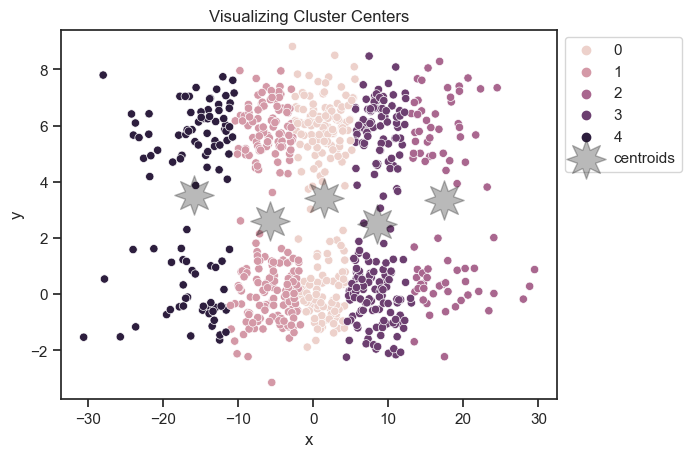

In [129]:
# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y = 'y', data = X, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'x', y = 'y', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = X['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');
plt.show()

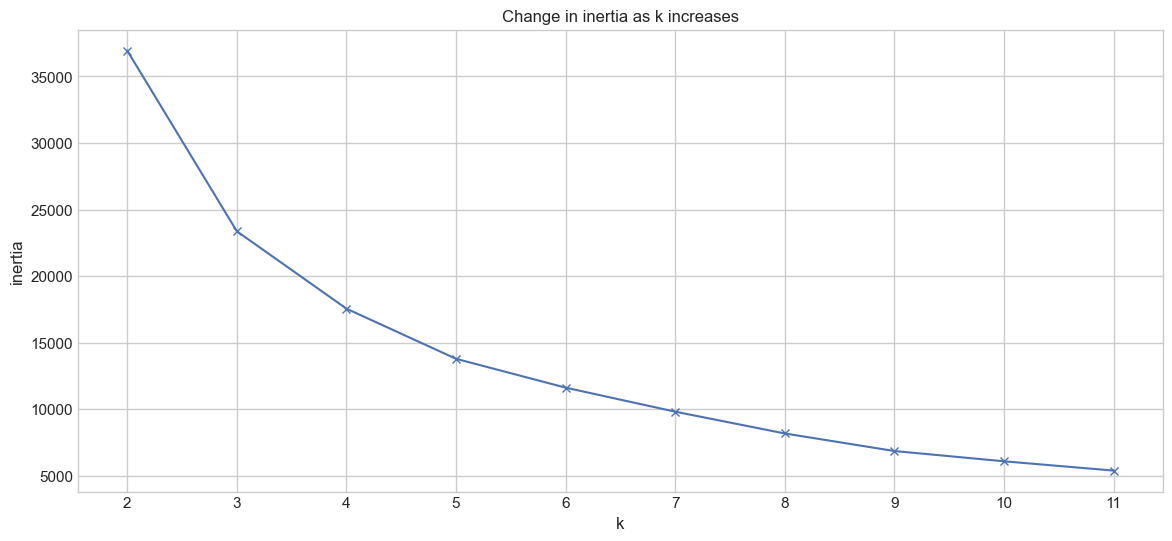

In [130]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')